# Clase Práctica: Escalamiento de Variables con Dataset de Pinguinos


## Importación de bibliotecas necesarias

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA




## 1. Cargar el dataset


In [98]:
url = 'data/penguins.csv'
X = pd.read_csv(url)

## 2. Exploración de los datos

In [100]:

print("Primeras filas del dataset:")
print(X.head())


X['sex'] = (X['sex']=='FEMALE').astype(int)


Primeras filas del dataset:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0    0
1              39.5             17.4              186.0       3800.0    1
2              40.3             18.0              195.0       3250.0    1
3               NaN              NaN                NaN          NaN    0
4              36.7             19.3              193.0       3450.0    1


### Resumen estadístico

In [91]:

print("\nResumen estadístico:")
print(X.describe())




Resumen estadístico:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
count        342.000000       342.000000         342.000000   342.000000   
mean          43.921930        17.151170         214.014620  4201.754386   
std            5.459584         1.974793         260.558057   801.954536   
min           32.100000        13.100000        -132.000000  2700.000000   
25%           39.225000        15.600000         190.000000  3550.000000   
50%           44.450000        17.300000         197.000000  4050.000000   
75%           48.500000        18.700000         213.750000  4750.000000   
max           59.600000        21.500000        5000.000000  6300.000000   

              sex  
count  344.000000  
mean     0.479651  
std      0.500313  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


### Visualización de la distribución de las variables


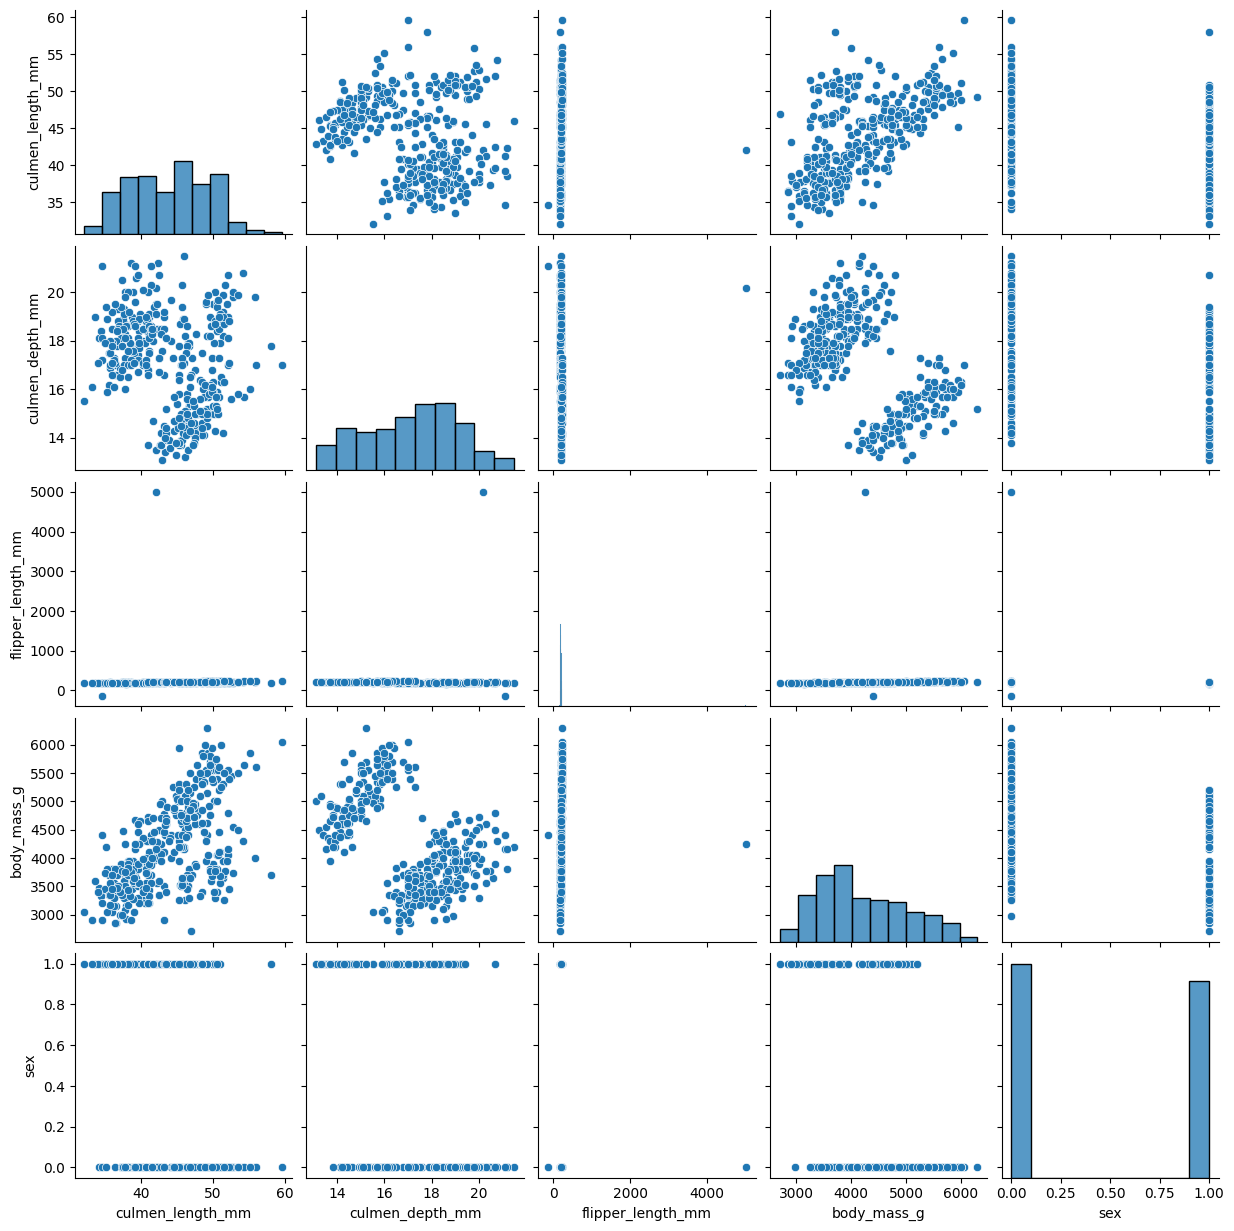

In [92]:
sns.pairplot(X)
plt.show()

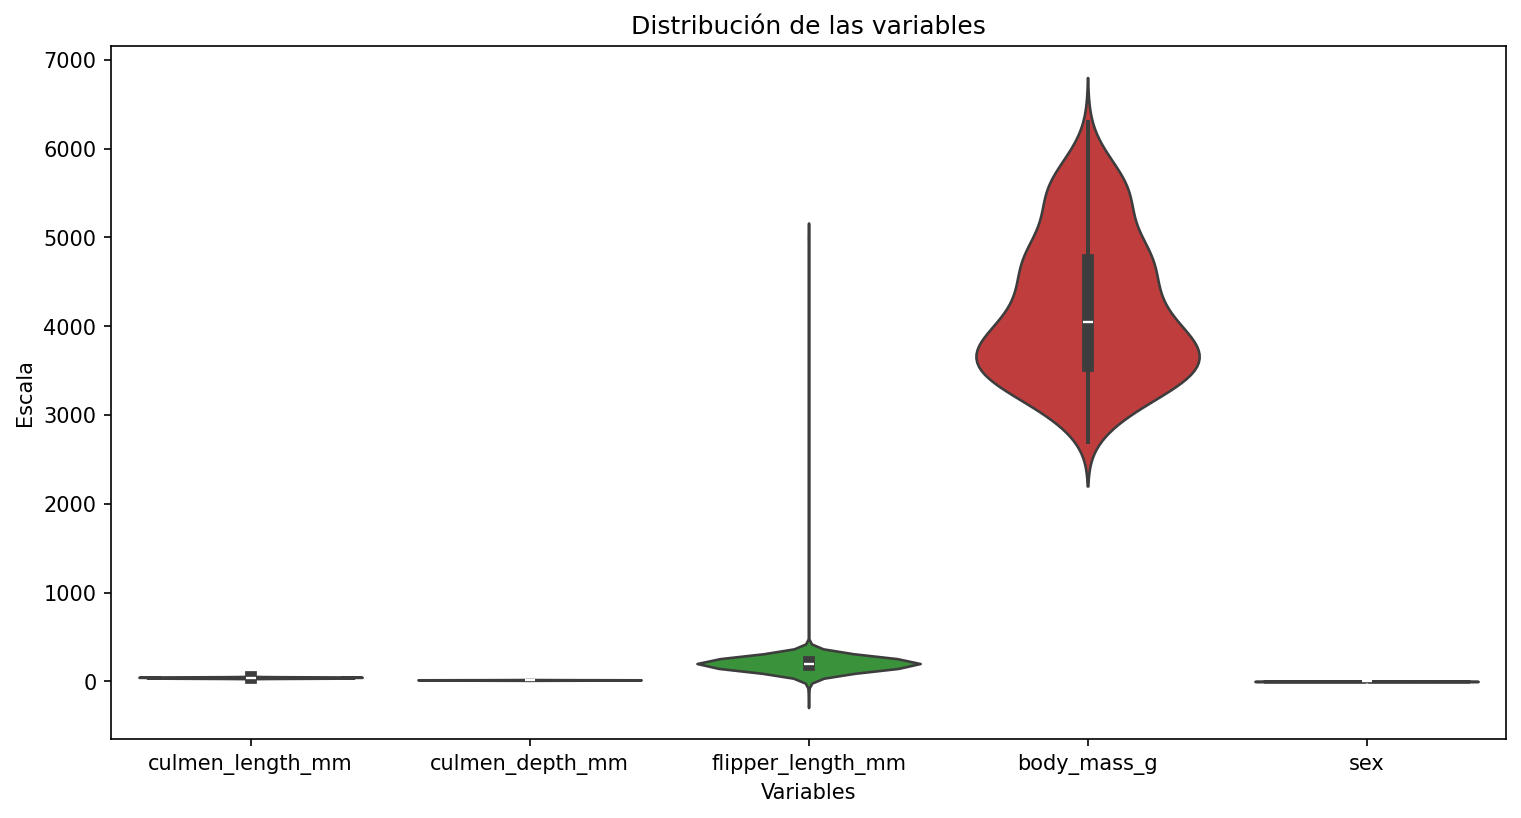

In [67]:
plt.figure( figsize = (12,6), dpi=150)
sns.violinplot( data=X)
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show() 

### body_mass_g y flipper_length_mm tienen escalas mucho más grandes que las otras y no nos dejan ver bien sus rangos y diferencias, veamos sólo esas otras variables entonces para entenderlas mejor

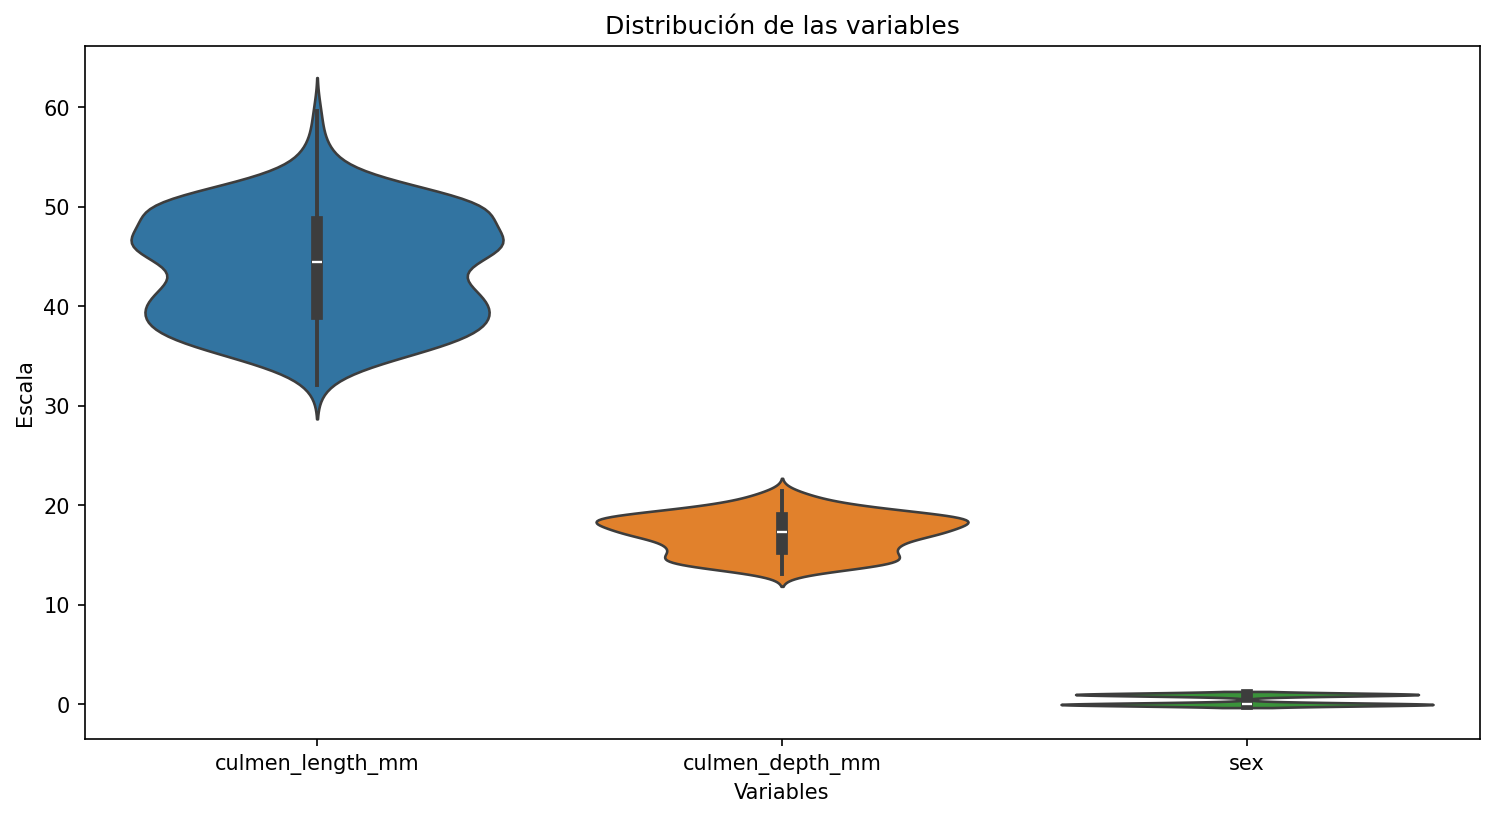

In [93]:
plt.figure( figsize = (12,6), dpi=150)
sns.violinplot( data=X.drop(['body_mass_g','flipper_length_mm'],axis=1))
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show() 

##### Eliminamos nulos ya que son pocos y para simplificar el análisis

In [94]:
print('Antes ',X.shape)

X = X.dropna()

print('Después ',X.shape)

Antes  (344, 5)
Después  (342, 5)


## 3.K-means sin escalamiento

Primero aplicaremos el [método del codo](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) para buscar el número ótimo de clusters

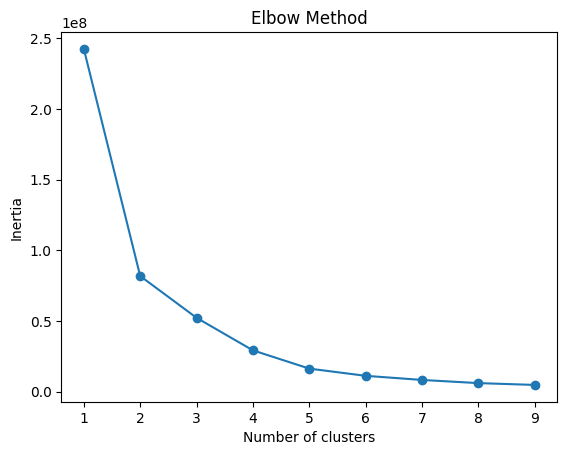

In [70]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [71]:
n_clusters = 4

Para poder analizar la calidad de nuestros clusters usaremos visualización de datos y el [coeficiente de silouhette](https://es.wikipedia.org/wiki/Silhouette_(clustering)).

Ya que tenemos varios features aplicaremos una reducción dimensional (en las próximas clases veremos más en profunidad esto) para quedarnos sólo con dos y visualizar fácilmente los clusters mediante scatter plots

In [72]:
pca = PCA(n_components=2)
penguins_PCA = pca.fit_transform(X)

Corremos K-Means sobre los datos reducidos y graficos con un scatter plot los clusters obtenidos

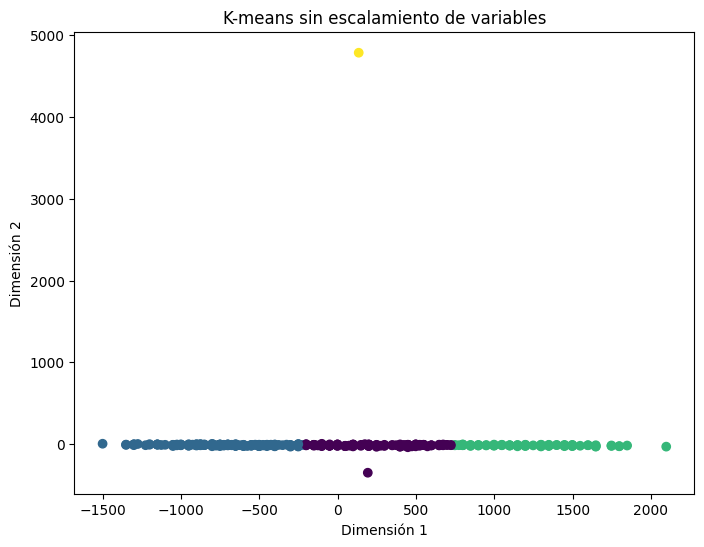

In [73]:

kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
clusters_no_scaling = kmeans.fit_predict(penguins_PCA)

# Visualización de los clusters sin escalamiento
plt.figure(figsize=(8,6))
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=clusters_no_scaling, cmap='viridis')
plt.title('K-means sin escalamiento de variables')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

## 4. Escalamiento de variables

Ahora aplicaremos distintas técnicas de escalamiento (antes de reducir) y veremos cómo afectan estas transformaciones al clustering.

### Estandarización

In [ ]:
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
penguins_PCA_standard = pca.fit_transform(X_standard_scaled)

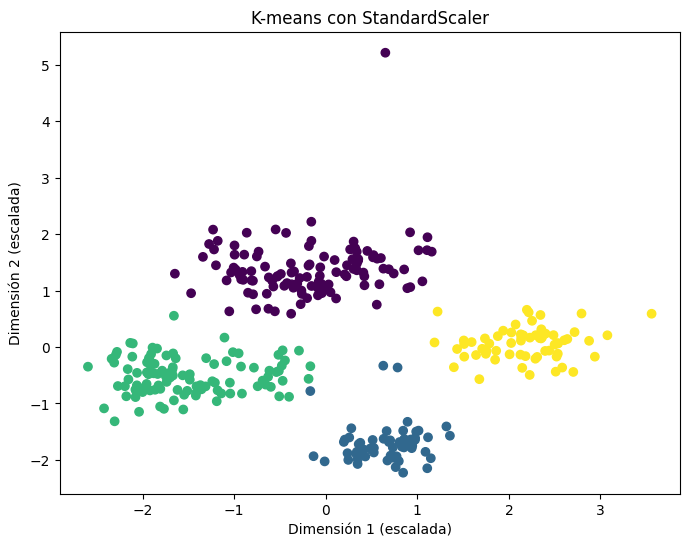

In [95]:
# Aplicar K-Means con variables escaladas (StandardScaler)
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)
clusters_standard = kmeans_standard.fit_predict(penguins_PCA_standard)


# Visualización de los clusters con StandardScaler
plt.figure(figsize=(8,6))
plt.scatter(penguins_PCA_standard[:, 0], penguins_PCA_standard[:, 1], c=clusters_standard, cmap='viridis')
plt.title('K-means con StandardScaler')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.show()

### Escalado a Mínimo-Máximo

In [82]:
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

In [85]:
pca = PCA(n_components=2)
penguins_PCA_minmax= pca.fit_transform(X_minmax_scaled)

/home/juanma/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


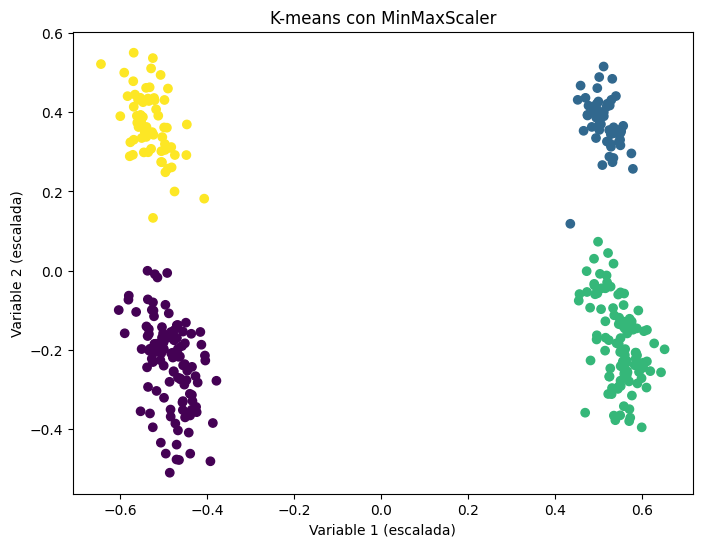

In [86]:
# 6. Aplicar K-Means con variables escaladas (MinMaxScaler)
kmeans_minmax = KMeans(n_clusters=n_clusters, random_state=42)
clusters_minmax = kmeans_minmax.fit_predict(penguins_PCA_minmax)

# Visualización de los clusters con MinMaxScaler
plt.figure(figsize=(8,6))
plt.scatter(penguins_PCA_minmax[:, 0], penguins_PCA_minmax[:, 1], c=clusters_minmax, cmap='viridis')
plt.title('K-means con MinMaxScaler')
plt.xlabel('Variable 1 (escalada)')
plt.ylabel('Variable 2 (escalada)')
plt.show()

## Comparación

Veamos ahora de forma más cuantitativa que cluster funcionó mejor

In [87]:
silhouette_no_scaling = silhouette_score(penguins_PCA, clusters_no_scaling)
silhouette_standard = silhouette_score(penguins_PCA_standard, clusters_standard)
silhouette_minmax = silhouette_score(penguins_PCA_minmax, clusters_minmax)

print(f'Silhouette score sin escalamiento: {silhouette_no_scaling}')
print(f'Silhouette score con StandardScaler: {silhouette_standard}')
print(f'Silhouette score con MinMaxScaler: {silhouette_minmax}')

Silhouette score sin escalamiento: 0.5726777557715959
Silhouette score con StandardScaler: 0.632852004019947
Silhouette score con MinMaxScaler: 0.7759481369822815
